<a href="https://colab.research.google.com/github/RishiKDA/Heart-Disease-Prediction-Using-Logistic-Regression/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


In [55]:
#loading the dataset from my GitHub repo
url = "https://raw.githubusercontent.com/RishiKDA/Heart-Disease-Prediction-Using-Logistic-Regression/main/Heart_disease_cleveland_new.csv"

df_raw = pd.read_csv(url)   #numeric
df = df_raw.copy()          #human-friendly copy

df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [56]:
#making it more non medical friendly
df["Gender"] = df["sex"].map({1: "Male", 0: "Female"})
df["High Blood Sugar"] = df["fbs"].map({1: "Yes", 0: "No"})
df["Exercise Pain"] = df["exang"].map({1: "Yes", 0: "No"})

cp_map = {0: "No Chest Pain", 1: "Mild Chest Pain", 2: "Moderate Chest Pain", 3: "Severe Chest Pain"}
df["Chest Pain"] = df["cp"].map(cp_map)

ecg_map = {0: "Normal ECG", 1: "Minor Issue", 2: "Major Issue"}
df["ECG Result"] = df["restecg"].map(ecg_map)

thal_map = {0: "Normal", 1: "Fixed Defect", 2: "Reversible Defect"}
df["Thalassemia"] = df["thal"].map(thal_map)

df = df.rename(columns={
    "age": "Age",
    "trestbps": "Resting BP",
    "chol": "Cholesterol",
    "thalach": "Max Heart Rate",
    "oldpeak": "Stress Indicator",
    "slope": "Heart Rate Slope",
    "ca": "Blocked Arteries",
    "target": "Heart Disease"
})

df.head()


,Age,sex,cp,Resting BP,Cholesterol,fbs,restecg,Max Heart Rate,exang,Stress Indicator,Heart Rate Slope,Blocked Arteries,thal,Heart Disease,Gender,High Blood Sugar,Exercise Pain,Chest Pain,ECG Result,Thalassemia
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0,Male,Yes,No,No Chest Pain,Major Issue,Reversible Defect
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1,Male,No,Yes,Severe Chest Pain,Major Issue,Fixed Defect
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1,Male,No,Yes,Severe Chest Pain,Major Issue,NaN
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0,Male,No,No,Moderate Chest Pain,Normal ECG,Fixed Defect
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0,Female,No,No,Mild Chest Pain,Major Issue,Fixed Defect


In [57]:
#making clean numeric dataset for training

df_ml = pd.DataFrame()

df_ml["age"] = df_raw["age"]
df_ml["sex"] = df_raw["sex"]
df_ml["cp"] = df_raw["cp"]
df_ml["trestbps"] = df_raw["trestbps"]
df_ml["chol"] = df_raw["chol"]
df_ml["fbs"] = df_raw["fbs"]
df_ml["restecg"] = df_raw["restecg"]
df_ml["thalach"] = df_raw["thalach"]
df_ml["exang"] = df_raw["exang"]
df_ml["oldpeak"] = df_raw["oldpeak"]
df_ml["slope"] = df_raw["slope"]
df_ml["ca"] = df_raw["ca"]
df_ml["thal"] = df_raw["thal"]
df_ml["target"] = df_raw["target"]

df_ml.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [58]:
#splitting the dataset

X = df_ml.drop("target", axis=1)
y = df_ml["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((242, 13), (61, 13))

In [59]:
#scaling the values

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [60]:
# training logistic regression

lr = LogisticRegression(max_iter=2000)
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)
y_prob = lr.predict_proba(X_test_scaled)[:, 1]

print("Done training.\n")

print("Classification report:")
print(classification_report(y_test, y_pred))

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

print("AUC:", roc_auc_score(y_test, y_prob))

model = lr


Done training.

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

Confusion matrix:
[[25  4]
 [ 3 29]]
AUC: 0.9213362068965516


In [61]:
#checking performance of the model
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

print("AUC Score:", roc_auc_score(y_test, y_prob))


Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

Confusion Matrix:

[[25  4]
 [ 3 29]]
AUC Score: 0.9213362068965516


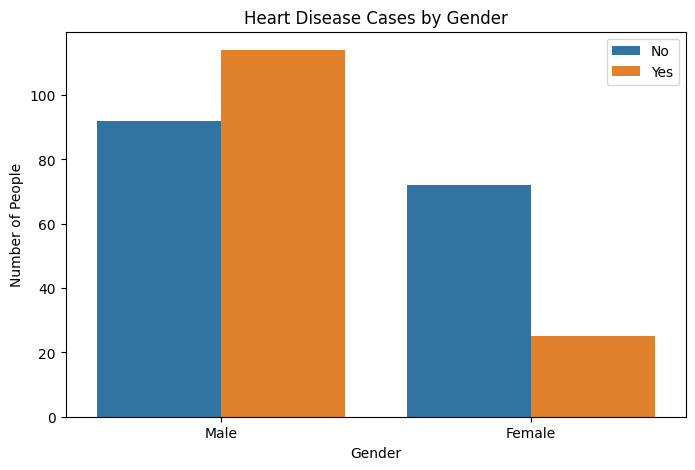

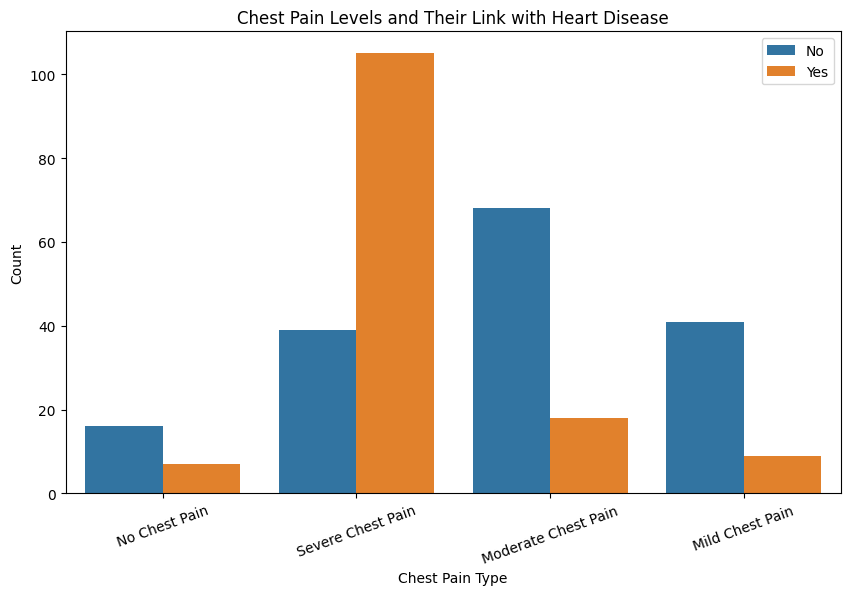

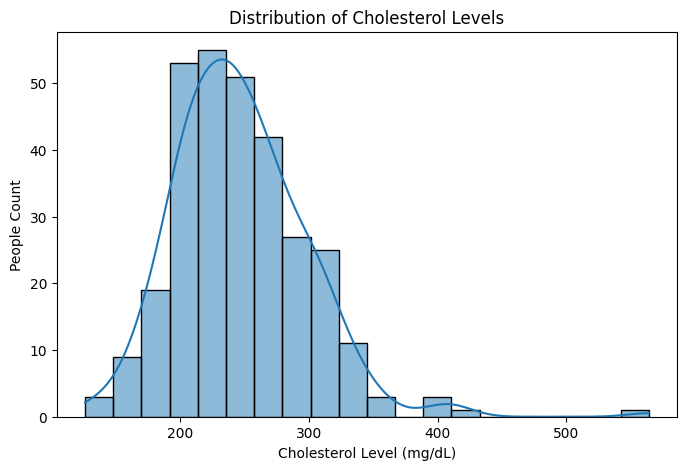

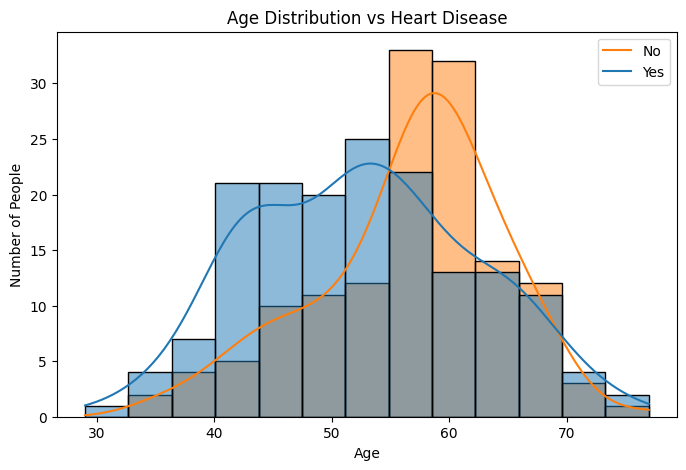

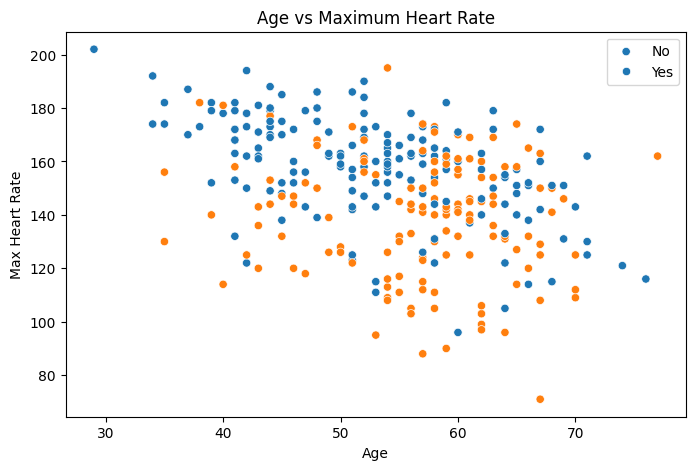

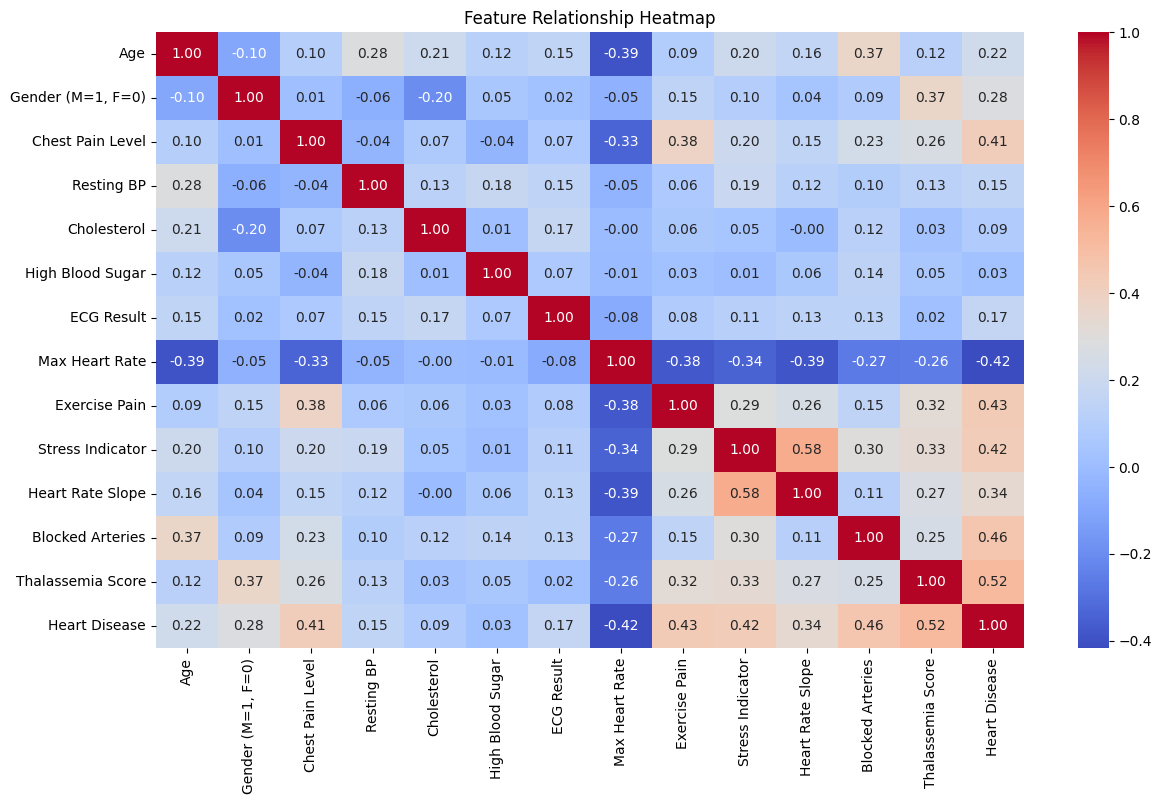

In [62]:
#gender vs disease count
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Gender", hue="Heart Disease")
plt.title("Heart Disease Cases by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of People")
plt.legend(["No", "Yes"])
plt.show()

#different chest pain categories vs disease cases
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Chest Pain", hue="Heart Disease")
plt.title("Chest Pain Levels and Their Link with Heart Disease")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.legend(["No", "Yes"])
plt.xticks(rotation=20)
plt.show()

#cholesterol spread
plt.figure(figsize=(8,5))
sns.histplot(df["Cholesterol"], bins=20, kde=True)
plt.title("Distribution of Cholesterol Levels")
plt.xlabel("Cholesterol Level (mg/dL)")
plt.ylabel("People Count")
plt.show()

#age spread to disease
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Age", hue="Heart Disease", kde=True)
plt.title("Age Distribution vs Heart Disease")
plt.xlabel("Age")
plt.ylabel("Number of People")
plt.legend(["No", "Yes"])
plt.show()

#age vs max heart rate
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Age", y="Max Heart Rate", hue="Heart Disease")
plt.title("Age vs Maximum Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["No", "Yes"])
plt.show()

#heatmap
corr_df = df_ml.copy()

corr_df = corr_df.rename(columns={
    "age": "Age",
    "sex": "Gender (M=1, F=0)",
    "cp": "Chest Pain Level",
    "trestbps": "Resting BP",
    "chol": "Cholesterol",
    "fbs": "High Blood Sugar",
    "restecg": "ECG Result",
    "thalach": "Max Heart Rate",
    "exang": "Exercise Pain",
    "oldpeak": "Stress Indicator",
    "slope": "Heart Rate Slope",
    "ca": "Blocked Arteries",
    "thal": "Thalassemia Score",
    "target": "Heart Disease"
})

plt.figure(figsize=(14,8))
sns.heatmap(corr_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Relationship Heatmap")
plt.show()


In [63]:
#function to check new patient's risk
def predict_new_patient(model):

    print("---- Enter Person's Details ----")

    g = input("Gender (M/F): ").strip().upper()
    g = 1 if g == "M" else 0

    age = int(input("Age: "))
    cp = int(input("Chest Discomfort Level (0=None, 1=Light, 2=Medium, 3=Severe): "))
    bp = int(input("Resting Blood Pressure: "))
    chol = int(input("Cholesterol Level: "))

    sugar = int(input("High Blood Sugar? (1=Yes, 0=No): "))
    ecg = int(input("ECG Reading (0=Normal, 1=Slight Issue, 2=Major Issue): "))

    hr = int(input("Highest Heart Rate Reached: "))
    ex = int(input("Chest Pain While Exercising? (1=Yes, 0=No): "))

    stress = float(input("Stress Level Number: "))
    sl = int(input("Slope Value (0=Down, 1=Flat, 2=Up): "))

    b = int(input("Blocked Arteries Count (0 to 3): "))
    th = int(input("Thalassemia (0=Normal, 1=Fixed, 2=Reversible): "))

    df_new = pd.DataFrame([{
        "age": age,
        "sex": g,
        "cp": cp,
        "trestbps": bp,
        "chol": chol,
        "fbs": sugar,
        "restecg": ecg,
        "thalach": hr,
        "exang": ex,
        "oldpeak": stress,
        "slope": sl,
        "ca": b,
        "thal": th
    }])

    scaled = scaler.transform(df_new)

    prob = model.predict_proba(scaled)[0][1]
    pred = model.predict(scaled)[0]

    print("\n---- Result ----")
    print("Estimated Risk:", round(prob*100, 2), "%")
    print("Final Prediction:", "Likely Disease" if pred == 1 else "Not Likely")


In [64]:
#manual prediction
predict_new_patient(model)


---- Enter Person's Details ----
Gender (M/F): m
Age: 57
Chest Discomfort Level (0=None, 1=Light, 2=Medium, 3=Severe): 2
Resting Blood Pressure: 134
Cholesterol Level: 244
High Blood Sugar? (1=Yes, 0=No): 1
ECG Reading (0=Normal, 1=Slight Issue, 2=Major Issue): 2
Highest Heart Rate Reached: 131
Chest Pain While Exercising? (1=Yes, 0=No): 1
Stress Level Number: 3
Slope Value (0=Down, 1=Flat, 2=Up): 2
Blocked Arteries Count (0 to 3): 1
Thalassemia (0=Normal, 1=Fixed, 2=Reversible): 2

---- Result ----
Estimated Risk: 94.1 %
Final Prediction: Likely Disease
